# **Project Name**    - Mental Health in the Tech Industry: An Exploratory Data Analysis

##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

This project uses a real-world dataset collected through a mental health survey conducted among tech workers. The survey includes responses from over 1,200 individuals, capturing demographic information (age, gender, country), employment status (self-employed or not), and questions related to mental health, such as treatment history, workplace interference, employer support, and perceptions of stigma.

We began by cleaning the data: removing unrealistic age values, stripping unwanted spaces from categorical fields, and handling missing values thoughtfully based on the context. For example, ‘self_employed’ entries missing were filled with ‘Unknown’, and the ‘work_interfere’ field was set to ‘Not applicable’ for those who didn’t report mental health issues.

The analysis focuses on exploring how mental health treatment and attitudes vary by age, gender, job type, company size, and location. We also examine the availability of mental health benefits, the ease of taking leave, and whether employees feel safe discussing mental health issues at work. By using visualizations and group-wise comparisons, the project uncovers which factors are most strongly associated with mental health struggles and support in the workplace.

In the end, this EDA provides valuable insights into the gaps between employee needs and company policies. It helps highlight what changes can be made to encourage more open discussions, reduce stigma, and build a more mentally healthy tech industry. These insights can support HR teams, tech founders, and policymakers in making informed, data-driven decisions that prioritize mental well-being in the workplace.

# **GitHub Link -** https://github.com/shivanisingh-19/Mental-Health-EDA-Tech-Industry

# **Problem Statement**

Mental health issues are becoming more common in the tech industry.

High-pressure jobs, long working hours, and remote work add to the mental stress.

Many employees struggle silently due to the stigma around discussing mental health at work.

**Companies often lack proper support systems like:**

 1. Mental health benefits

 2. Awareness programs

 3. Supportive leave policies

**Because of this, it’s important to study:**

 1. How different tech workers experience mental health challenges

 2. Whether they seek help or not

 3. How job type, company size, and location affect their experiences


#### **Define Your Business Objective?**

The goal of this project is to analyze survey responses from individuals in the tech industry to:

1. Identify common patterns and trends related to mental health issues.

2. Understand how factors like company support, job type, family history, and remote work influence whether individuals seek treatment.

3. Discover how workplace culture affects employees’ willingness to talk about mental health.

4. Provide actionable insights that can help tech companies build healthier, more supportive work environments.

## ***1. Knowing the Data***

### Import Libraries


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading


In [ ]:
df = pd. read_csv("/content/drive/MyDrive/Mental Health /survey.csv")


### Dataset First View

In [ ]:
df.head(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


### Dataset Rows & Columns count

In [ ]:
df.shape

(1259, 27)

### Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_values = df.duplicated().sum()

print(f"Number of duplicate entries: {df.duplicated().sum()}")


Number of duplicate entries: 0


#### Missing Values/Null Values

In [ ]:
count = df.isnull().sum()


In [ ]:
count

,0
Timestamp,0
Age,0
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0


In [ ]:
# Visualizing the missing values

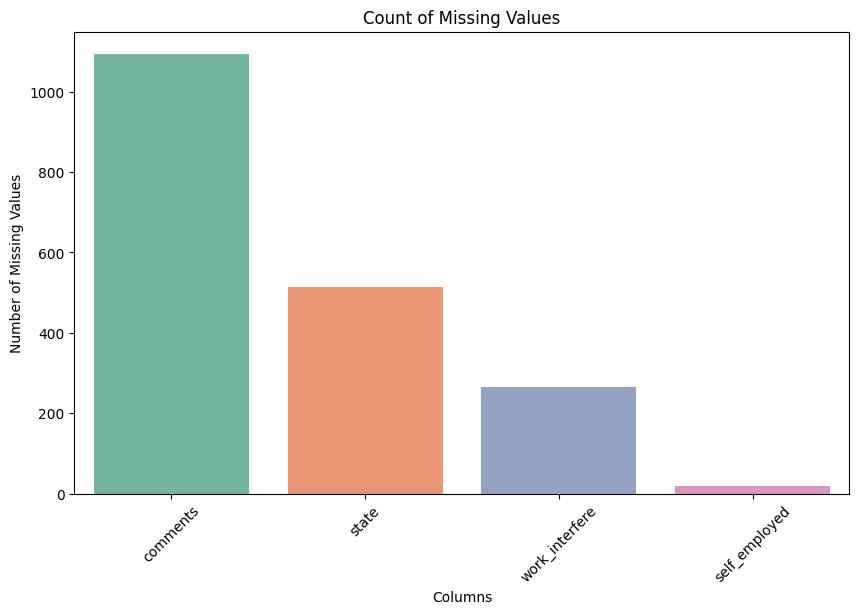

In [ ]:
missing_values_count = count[count > 0] # This code is used to filter out columns that have zero missing values
missing_values_count = missing_values_count.sort_values(ascending=False)

if not missing_values_count.empty:
  plt.figure(figsize=(10,6))
  sns.barplot(x=missing_values_count.index, y=missing_values_count.values, hue = missing_values_count.index, palette='Set2', legend=False)
  plt.xlabel('Columns')
  plt.ylabel('Number of Missing Values')
  plt.title('Count of Missing Values')
  plt.xticks(rotation=45)
  plt.show()

else:
  print("No missing Values")

####Handling Missing Values

In [ ]:
# Handle 'self_employed' column: Fill NaN with 'Unknown'
df['self_employed'] =df['self_employed'].fillna('Unknown')

df['work_interfere'] = df['work_interfere'].fillna('Not applicable')

# Dropping 'comments' & 'state' columns
df.drop(['comments', 'state'], axis=1, inplace=True, errors='ignore')

print("\nMissing values After handling :", df.isnull().sum())


Missing values After handling : Timestamp                    0
Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64


####Data Type Conversion


In [ ]:
# 1. Convert 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# 2. Strip whitespace from ALL object (string) columns
str_cols = df.select_dtypes(include='object').columns
df[str_cols] = df[str_cols].apply(lambda x: x.str.strip())

# 3. Convert specific columns to lowercase
df['Country'] = df['Country'].str.lower()
df['Gender'] = df['Gender'].str.lower()

# 4. Validating and cleaning 'Age'
# Removing entries with unrealistic ages
df = df[(df['Age'] >= 18) & (df['Age'] <= 80)]

# 5. Convert all column names to lowercase
df.columns = df.columns.str.lower()


In [ ]:
#Displaying datatypes

df.dtypes

,0
timestamp,datetime64[ns]
age,int64
gender,object
country,object
self_employed,object
family_history,object
treatment,object
work_interfere,object
no_employees,object
remote_work,object


In [ ]:
# Checking the min & max age
print("Min age:", df['age'].min())
print("Max age:", df['age'].max())


Min age: 18
Max age: 72


### What did I know about my dataset?

The dataset comes from a mental health survey conducted in the tech industry (in 2014).

It contains 1,200+ responses from people working in tech-related jobs.

**The data includes:**

1. Demographics: Age, gender, country

2. Employment details: Self-employed or not, company size, remote work

3. Mental health background: Family history, treatment status, work interference

4. Workplace support: Benefits, leave, programs, resources

5. Attitudes & stigma: Willingness to talk to coworkers/supervisors, perceived consequences

6. The data is mostly categorical (yes/no/maybe) and required cleaning to handle missing values and inconsistent entries.

7. The goal is to analyze this data to understand how mental health is handled in tech workplaces, and how different factors influence treatment, support, and openness.





## ***2. Understanding the Variables***

In [ ]:
# Displaying Dataset Columns

df.columns

Index(['timestamp', 'age', 'gender', 'country', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [ ]:
# Displaying Statistical Summary of Dataset
df['age'].describe()

,age
count,1251.000000
mean,32.076739
std,7.288272
min,18.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,72.000000


### Variables Description

**timestamp:**	Date and time when the survey response was submitted

**age:**	Age of the respondent

**gender:**	Gender identity of the respondent

**country:**	Country of residence

**self_employed:**	Whether the respondent is self-employed

**family_history:**	If there is a family history of mental illness

**treatment:**	Whether the respondent has sought mental health treatment

**work_interfere:**	Whether mental health issues interfere with their work

**no_employees:**	Number of employees in their company/organization

**remote_work:**	Whether the respondent works remotely (≥ 50% of the time)

**tech_company:**	Whether the employer is a tech company

**benefits:**	If the employer provides mental health benefits

**care_options:**	If the respondent knows mental health care options provided by the employer

**wellness_program:**	If the employer has discussed mental health as part of a wellness program

**seek_help:**	Whether resources are provided to seek mental health help

**anonymity:**	If anonymity is protected when seeking mental health treatment

**leave:**	Ease of taking medical leave for mental health conditions

**mental_health_consequence:**	If discussing mental health with employer could have negative consequences

**phys_health_consequence:**	If discussing physical health could have negative consequences

**coworkers:**	Willingness to discuss mental health with coworkers

**supervisor:**	Willingness to discuss mental health with supervisor

**mental_health_interview:**	Willingness to discuss mental health in job interviews

**phys_health_interview:**	Willingness to discuss physical health in job interviews

**mental_vs_physical:**	Whether the employer treats mental and physical health equally

**obs_consequence:**	If respondent has seen negative outcomes for coworkers with mental health issues



### Check Unique Values for each variable.

In [ ]:
df.nunique()

,0
timestamp,1239
age,45
gender,38
country,46
self_employed,3
family_history,2
treatment,2
work_interfere,5
no_employees,6
remote_work,2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
def clean_gender(gender):
    gender = str(gender).lower().strip()

    if gender in ['male', 'm', 'male-ish', 'maile', 'cis male', 'man', 'malr', 'msle']:
        return 'male'
    elif gender in ['female', 'f', 'cis female', 'woman', 'femake', 'female (cis)', 'cis-female/femme']:
        return 'female'
    else:
        return 'other'

# Apply cleaning function
df['gender'] = df['gender'].apply(clean_gender)


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

####**Chart - 1 Univariate Analysis**

####**Age Distribution of Respondents**

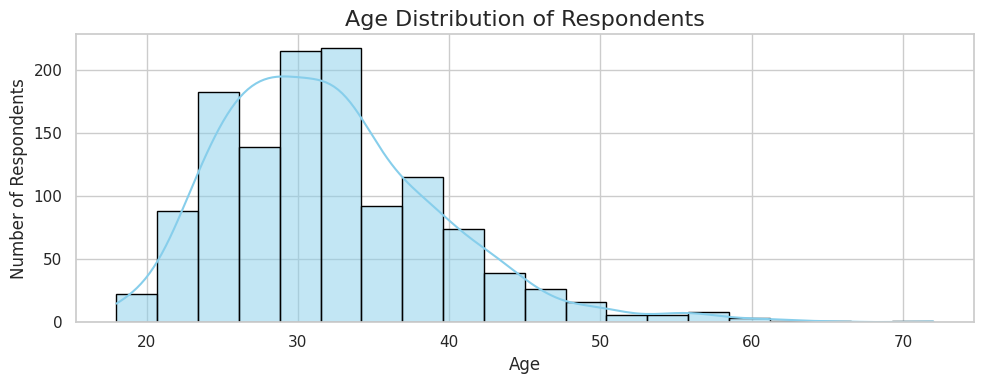

In [ ]:
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 4))

# Plot age distribution
sns.histplot(data=df, x='age', bins=20, kde=True, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Age Distribution of Respondents', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


##### 1. Why did I pick the specific chart?

To understand the age profile of survey participants.

##### 2. What are the insights found from the chart?

Most respondents are aged between 25–35 years — a key working-age tech demographic.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact**

Helps target mental health programs for the most represented age group.

**Negative Insight**

Older employees are underrepresented — could signal hesitation or lack of inclusion in discussions on mental health.

####**Chart - 2 Univariate Analysis**

####**Gender Distribution**

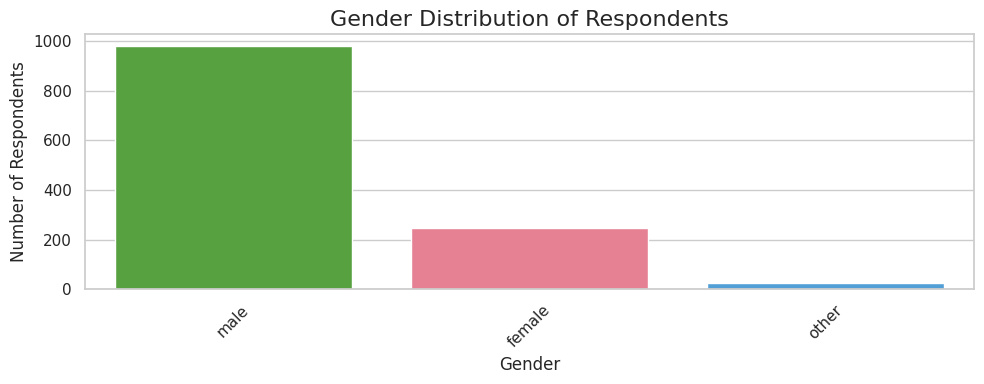

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='gender', order=df['gender'].value_counts().index, hue = 'gender',legend = False,palette='husl')
plt.xticks(rotation=45)

plt.title('Gender Distribution of Respondents', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 1. Why did I pick the specific chart?



To understand the gender composition of survey participants.

##### 2. What are the insights found from the chart?



Majority of respondents are male, followed by female, and very few identify as other.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



**Positive Impact**

Yes. Helps in tailoring mental health programs by gender representation.

**Negative Insight**

Low female/other representation may indicate underreporting or lack of inclusion — a sign to improve diversity and outreach.

####**Chart - 3 Univariate Analysis**

####**Top 10 Countries by Participation**

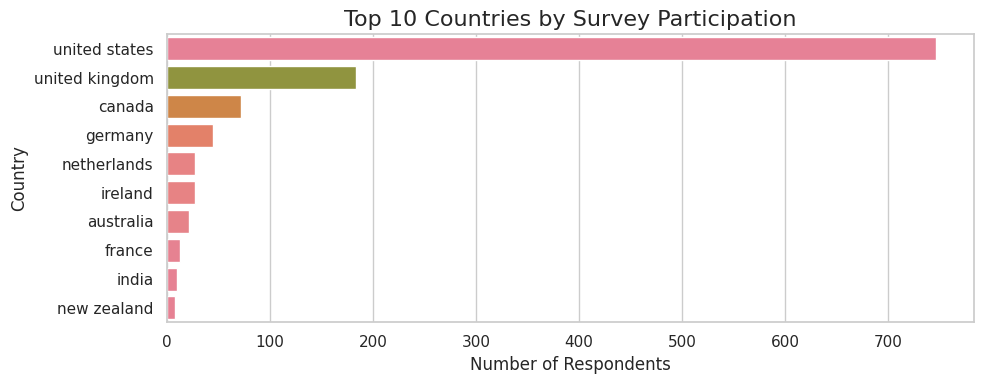

In [ ]:
# Create a new DataFrame for top 10 countries
top_countries_df = df['country'].value_counts().head(10).reset_index()
top_countries_df.columns = ['country', 'count']

# Plot using Seaborn without warning
plt.figure(figsize=(10, 4))
sns.barplot(data=top_countries_df, x='count', y='country',hue= 'count',legend= False, palette='husl')

plt.title('Top 10 Countries by Survey Participation', fontsize=16)
plt.xlabel('Number of Respondents')
plt.ylabel('Country')
plt.tight_layout()
plt.show()



##### 1. Why did I pick the specific chart?

To see which countries had the most responses and where mental health policies may be most relevant.

##### 2. What are the insights found from the chart?


United States, UK, and Canada lead the participation. Others have much lower response counts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact**

Yes. Shows where the data is most reliable and actionable (US, UK) for mental health strategies.

**Negative Insight**

Countries with low participation may lack awareness or access — indicating a need for global outreach or localized research.

####**Chart - 4 Univariate Analysis**

###**Percentage of People Who Sought Mental Health Treatment**

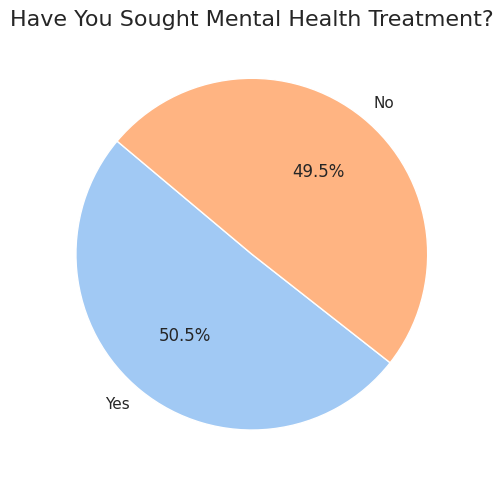

In [ ]:
treatment_counts = df['treatment'].value_counts()
treatment_labels = treatment_counts.index
treatment_sizes = treatment_counts.values

plt.figure(figsize=(5, 5))
plt.pie(treatment_sizes, labels=treatment_labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))

plt.title('Have You Sought Mental Health Treatment?', fontsize=16)
plt.tight_layout()
plt.show()


##### 1. Why did I pick the specific chart?

To understand how many people are actually seeking mental health treatment.

##### 2. What are the insights found from the chart?

Responses are almost evenly split — ~50% have sought treatment, ~50% haven’t.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact**

Yes. Indicates high need for awareness, benefits, and support in workplaces to encourage treatment.

**Negative Insight**

Yes. Nearly half the people avoiding treatment may suffer silently, reducing productivity and increasing long-term costs.

####**Chart - 5 Bivariate Analysis**

####**Family History vs. Treatment**

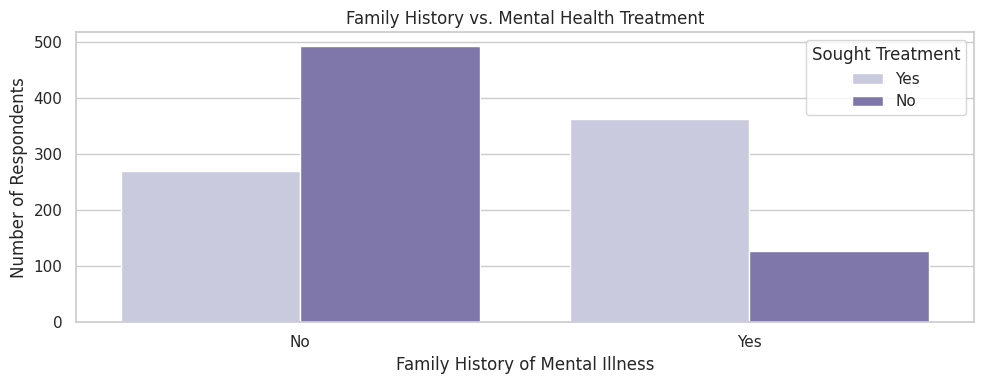

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='family_history', hue='treatment', palette='Purples')

plt.title('Family History vs. Mental Health Treatment')
plt.xlabel('Family History of Mental Illness')
plt.ylabel('Number of Respondents')
plt.legend(title='Sought Treatment')
plt.tight_layout()
plt.show()


##### 1. Why did I pick the specific chart?


Because it shows the relationship between family history of mental illness and whether someone seeks treatment — a key factor in understanding mental health behavior.

##### 2. What are the insights found from the chart?

People with a family history are more likely to seek treatment than those without.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact**

Yes. It helps employers identify at-risk groups and plan early support programs to encourage treatment.

**Negative Insight**

Yes. Many people without family history are avoiding treatment, possibly due to lack of awareness or stigma — which can reduce productivity if untreated.

####**Chart - 6 Bivariate Analysis**

####**Work Interference by Treatment Status**

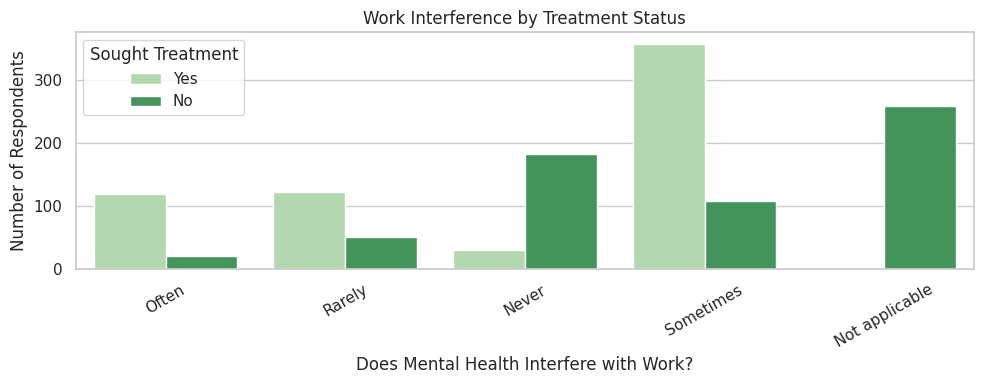

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='work_interfere', hue='treatment', palette='Greens')

plt.title('Work Interference by Treatment Status')
plt.xlabel('Does Mental Health Interfere with Work?')
plt.ylabel('Number of Respondents')
plt.legend(title='Sought Treatment')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


##### 1. Why did I pick the specific chart?

To analyze if people whose mental health affects work are more likely to seek treatment.

##### 2. What are the insights found from the chart?

People who report “Sometimes” or “Often” interference are more likely to seek treatment. Those who say “Never” mostly don’t.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact**

Helps companies focus support on employees whose work is affected by mental health.

**Negative Insight**

Many with mild interference may avoid treatment — which could lead to burnout or decreased productivity over time.



####**Chart - 7 Bivariate Analysis**

####**Mental Health Support vs. Company Size**

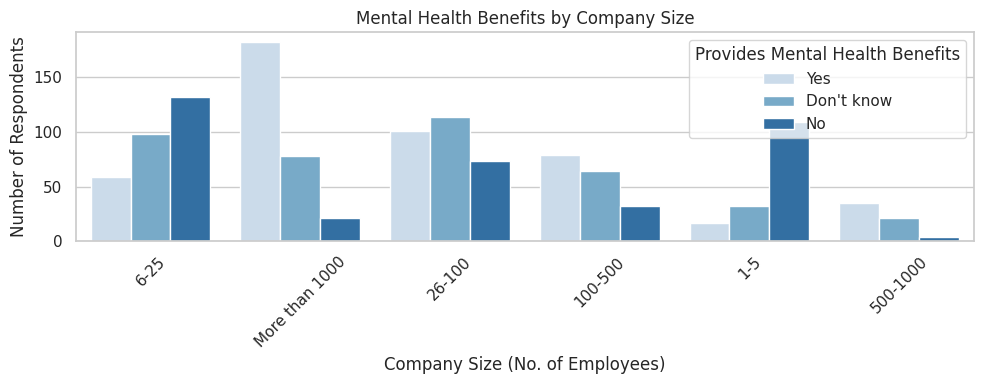

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='no_employees', hue='benefits', palette='Blues')

plt.title('Mental Health Benefits by Company Size')
plt.xlabel('Company Size (No. of Employees)')
plt.ylabel('Number of Respondents')
plt.legend(title='Provides Mental Health Benefits')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 1. Why did I pick the specific chart?

To see if larger companies provide better mental health benefits.

##### 2. What are the insights found from the chart?

Large companies (>1000 employees) are more likely to provide benefits. Small companies (1–5 employees) mostly don’t.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact**

Encourages smaller firms to consider offering support to remain competitive and improve employee well-being.

**Negative Insight**

Lack of support in smaller companies may cause higher turnover or lower morale.

####**Chart - 8 Bivariate Analysis**


####**Remote Work vs. Mental Health Treatment**

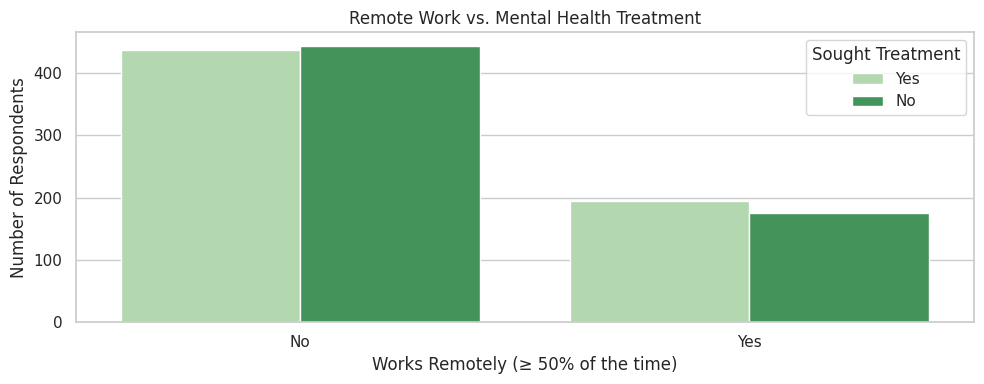

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='remote_work', hue='treatment', palette='Greens')

plt.title('Remote Work vs. Mental Health Treatment')
plt.xlabel('Works Remotely (≥ 50% of the time)')
plt.ylabel('Number of Respondents')
plt.legend(title='Sought Treatment')
plt.tight_layout()
plt.show()


##### 1. Why did I pick the specific chart?

To check if remote workers are more or less likely to seek treatment.

##### 2. What are the insights found from the chart?


More on-site workers have sought treatment compared to remote workers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact**

Suggests a need for stronger remote mental health resources or awareness.

**Negative Insight**

Remote workers may feel isolated and unsupported, reducing their likelihood of seeking help.

####**Chart - 9 Bivariate Analysis**

####**Self-employed vs. Employed: Support & Treatment**

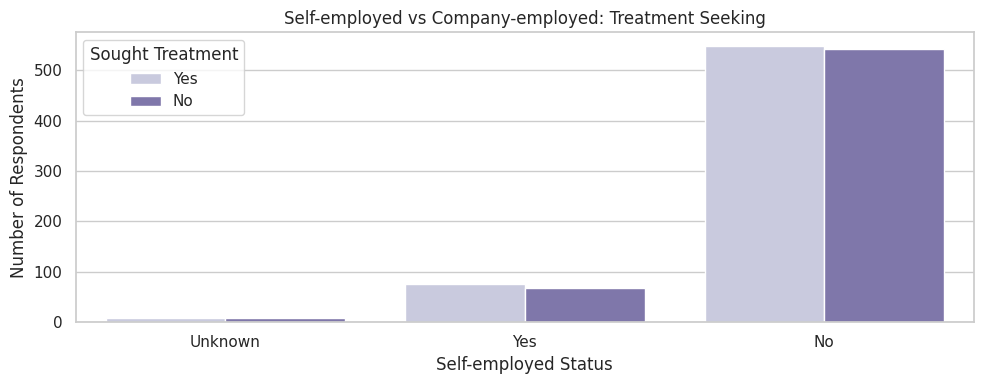

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='self_employed', hue='treatment', palette='Purples')

plt.title('Self-employed vs Company-employed: Treatment Seeking')
plt.xlabel('Self-employed Status')
plt.ylabel('Number of Respondents')
plt.legend(title='Sought Treatment')
plt.tight_layout()
plt.show()


##### 1. Why did I pick the specific chart?

To compare treatment behavior between self-employed and company-employed individuals.

##### 2. What are the insights found from the chart?

Company-employed individuals are more likely to seek treatment.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact**

Shows the importance of company-provided support systems.

**Negative Insight**

Self-employed individuals may lack access or awareness of mental health resources.



####**Chart - 10 Bivariate Analysis**

####**Anonymity vs. Seeking Help**

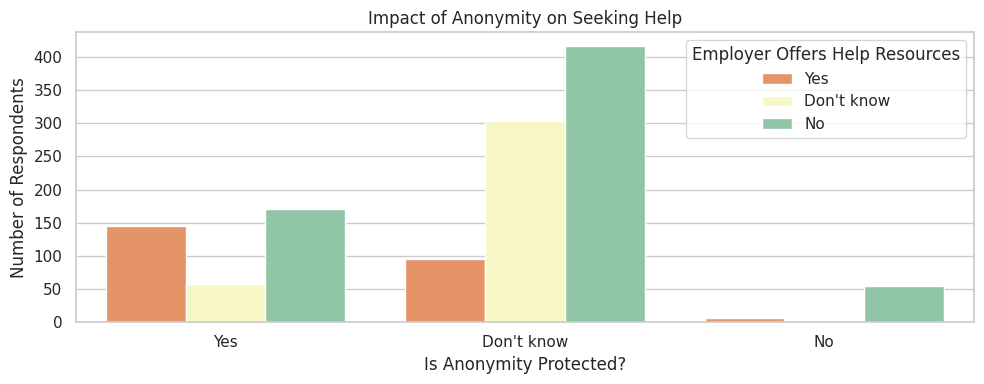

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='anonymity', hue='seek_help', palette='Spectral')

plt.title('Impact of Anonymity on Seeking Help')
plt.xlabel('Is Anonymity Protected?')
plt.ylabel('Number of Respondents')
plt.legend(title='Employer Offers Help Resources')
plt.tight_layout()
plt.show()


##### 1. Why did I pick the specific chart?

To see if protecting anonymity affects use of mental health resources.

##### 2. What is/are the insight(s) found from the chart?

When anonymity is protected, more people seek help. Uncertainty or lack of protection discourages it.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact**

Strong case for ensuring confidential support in the workplace.

**Negative Insight**

“Don’t know” responses are high — suggesting communication gaps in company policies.

####**Chart - 11 Bivariate Analysis**

####**Coworker & Supervisor Communication Willingness**

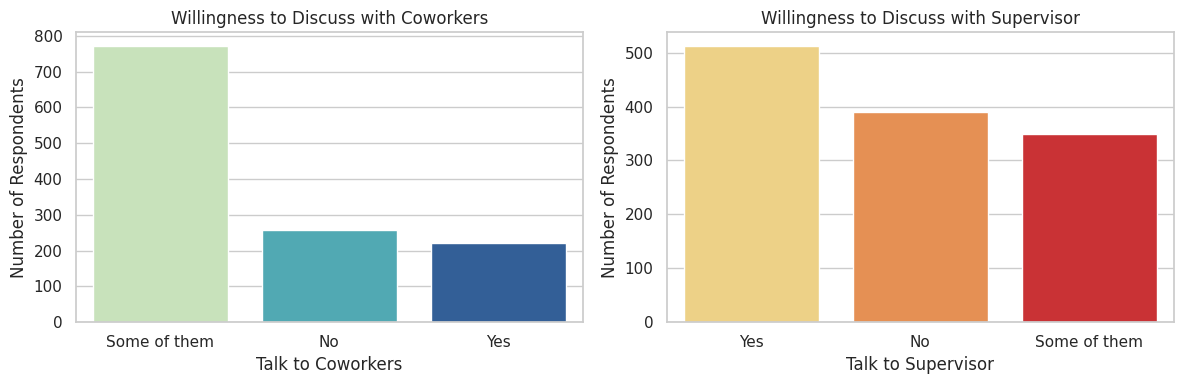

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(data=df, x='coworkers', ax=axs[0], hue='coworkers',palette='YlGnBu')
axs[0].set_title('Willingness to Discuss with Coworkers')
axs[0].set_xlabel('Talk to Coworkers')
axs[0].set_ylabel('Number of Respondents')

sns.countplot(data=df, x='supervisor', ax=axs[1], hue='supervisor',palette='YlOrRd')
axs[1].set_title('Willingness to Discuss with Supervisor')
axs[1].set_xlabel('Talk to Supervisor')
axs[1].set_ylabel('Number of Respondents')

plt.tight_layout()
plt.show()


##### 1. Why did I pick the specific chart?

To measure workplace openness and stigma.

##### 2. What are the insights found from the chart?


More employees are open to talking to some coworkers than supervisors.

Very few speak freely with all coworkers or supervisors.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact**

Indicates the need to foster a more open culture and train managers for empathetic communication.

**Negative Insight**

Lack of comfort talking to supervisors may prevent employees from seeking official support.

####**Chart - 12 Bivariate Analysis**

####**Leave Policy Difficulty vs. Treatment Seeking**

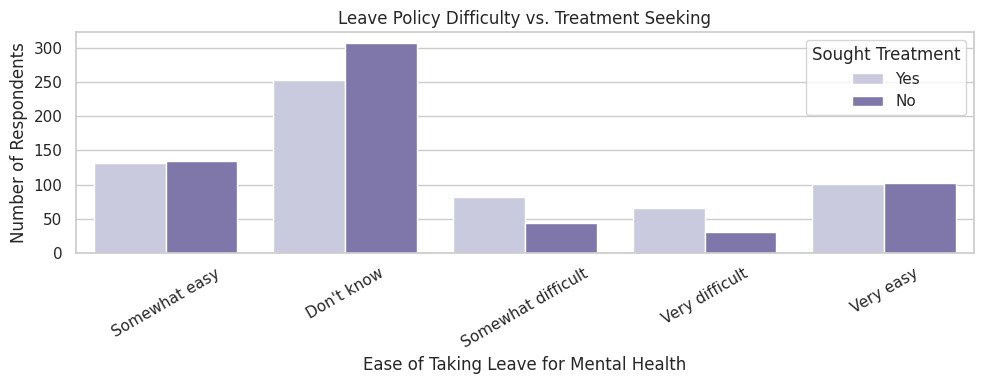

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='leave', hue='treatment', palette='Purples')

plt.title('Leave Policy Difficulty vs. Treatment Seeking')
plt.xlabel('Ease of Taking Leave for Mental Health')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=30)
plt.legend(title='Sought Treatment')
plt.tight_layout()
plt.show()



##### 1. Why did I pick the specific chart?

To analyze if leave policy difficulty affects the decision to seek mental health treatment.

##### 2. What are the insights found from the chart?



Employees who don’t know or face difficulty taking leave are less likely to seek treatment.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact**

Highlights the importance of clear, supportive leave policies for mental wellness.

**Negative Insight**

Poor or unclear policies may discourage employees from addressing mental health issues early.

####**Chart 13 Bivariate Analysis**

####**Mental vs. Physical Health Equality in the Workplace**

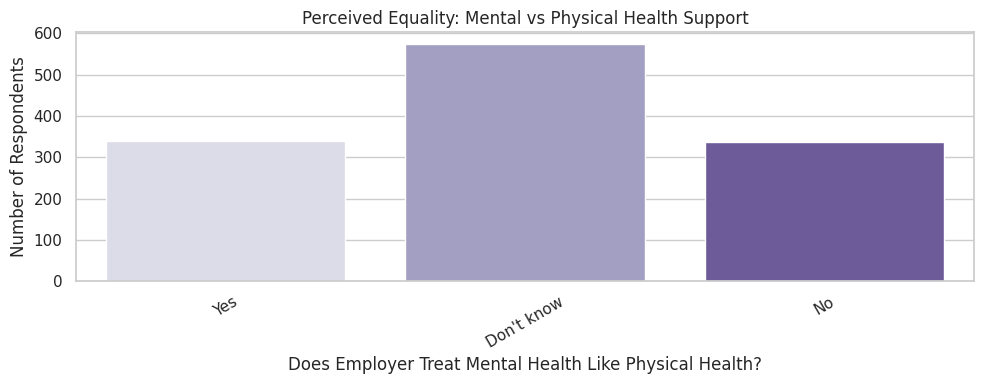

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='mental_vs_physical', hue= 'mental_vs_physical',palette='Purples')

plt.title('Perceived Equality: Mental vs Physical Health Support')
plt.xlabel('Does Employer Treat Mental Health Like Physical Health?')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


##### 1. Why did I pick the specific chart?

To assess how fairly companies treat mental health compared to physical health.

##### 2. What are the insights found from the chart?



The majority either say “No” or “Don’t know” — only a minority believe mental health is treated equally.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact**

Strong reason to reassess policies and ensure mental health gets equal priority.

**Negative Insight**

This perceived inequality can worsen stigma and discourage people from using available support.

In [ ]:
import statsmodels.api as sm

# Encode binary values
df['treatment_binary'] = df['treatment'].map({'Yes': 1, 'No': 0})
df['family_history_bin'] = df['family_history'].map({'Yes': 1, 'No': 0})

# Create dummy variables
X1 = pd.get_dummies(df[['gender', 'age', 'family_history_bin']], drop_first=True)
y1 = df['treatment_binary']

# Convert to float to avoid ValueError
X1 = sm.add_constant(X1)
X1 = X1.astype(float)
y1 = y1.astype(float)

# Fit the model
model1 = sm.Logit(y1, X1).fit()
print(model1.summary())



Optimization terminated successfully.
         Current function value: 0.604168
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:       treatment_binary   No. Observations:                 1251
Model:                          Logit   Df Residuals:                     1246
Method:                           MLE   Df Model:                            4
Date:                Sat, 28 Jun 2025   Pseudo R-squ.:                  0.1283
Time:                        07:56:07   Log-Likelihood:                -755.81
converged:                       True   LL-Null:                       -867.06
Covariance Type:            nonrobust   LLR p-value:                 5.453e-47
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7662      0.307     -2.493      0.013      -1.369      -0.164
age  

## **5. Solution to Business Objective**

**1. Implement Clear Mental Health Policies:**

Provide confidential access to mental health resources.

Clearly communicate whether anonymity is protected when seeking help.

**2. Expand Mental Health Benefits Across All Company Sizes:**

Encourage small and mid-sized companies to offer support programs, even through low-cost options like counseling sessions or awareness drives.

**3. Train Managers and Team Leads:**

Improve communication around mental health by training supervisors to handle sensitive discussions professionally and empathetically.

**4. Encourage Openness at Work:**

Promote a culture where talking about mental health is as normal as discussing physical health.

**5. Focus on Remote Workers and Self-employed Individuals:**

Build virtual support systems, such as remote therapy access or mental wellness check-ins.

Create outreach campaigns specifically for freelancers or self-employed professionals.

**6. Use Data to Identify At-Risk Groups:**

Employees with family history, frequent work interference, or who are unsure about company support should be given extra attention.


# **Conclusion**

This EDA reveals that while awareness and treatment for mental health issues are growing, significant gaps remain — especially among remote workers, self-employed individuals, and those in smaller companies.

The findings highlight a strong link between work interference and treatment-seeking, the importance of anonymity, and how company size affects access to benefits.

**By using data to tailor support systems, businesses can:**
*   Improve employee well-being
*   Reduce burnout and absenteeism
*   Create a mentally healthy, open, and productive workplace

A data-driven mental health strategy is no longer optional — it's essential for sustainable growth in the tech industry.